# QBio REU Intermediate Python 
## Week 3: More Numpy and Matplotlib

Prepared by John Russell (johnrussell@g.harvard.edu)

July 2020

In [73]:
np.arange(5) + 2

array([2, 3, 4, 5, 6])

### Numpy Broadcasting

Last time, we essentially said that arrays needed to have the same shape to work together. This is not true, they only need to have *compatible* shapes.

![Scalar broadcasting](np_broadcasting_1.png)

![Broadcasting](np_broadcasting_2.png)

![Bad broadcasting](np_broadcasting_3.png)

![More complex broadcasting](np_broadcasting_4.png)

[A quick introduction to broadcasting](https://numpy.org/doc/stable/user/theory.broadcasting.html#array-broadcasting-in-numpy) and where I got the figures above.

[Slightly more detail about broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

### Softmax exercise

The softmax funtion takes a vector of real numbers and converts it to a valid probability vector (i.e. a vector whose elements are all positive and sum to 1.) The softmax function is defined as

$$ \text{softmax}(x)_i = \dfrac{e^{x_i}}{\sum_j e^{x_j}}.$$

In [74]:
scores = 10*np.random.randn(1000,16)

In [96]:
# exponentiate
sfmax1 = np.exp(scores)
# sum exponentials 
denom = np.sum(sfmax1, axis=-1)
# divide
sfmax = sfmax1/denom#.reshape(-1,1)

ValueError: operands could not be broadcast together with shapes (1000,16) (1000,) 

In [91]:
np.arange(10)[np.newaxis, :, np.newaxis, np.newaxis].shape

(1, 10, 1, 1)

In [84]:
print(sfmax1.shape)
print(denom.shape)

(1000, 16)
(1000, 1)


In [80]:
denom.reshape(-1,1).shape

(1000, 1)

In [93]:
# Roll into a function
def my_softmax(x, axis):
    out = np.exp(x)
    sum = out.sum(axis=axis, keepdims=True)
    return out/sum
# use keepdims

In [94]:
# Check with scipy
from scipy.special import softmax

In [95]:
np.allclose(my_softmax(scores, axis=-1), softmax(scores, axis=-1))

True

### Numpy Indexing

Numpy arrays can be indexed similar to the way we accessed the ele

In [97]:
arr = np.arange(20).reshape(4,5)
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [98]:
arr[2] #like list of lists

array([10, 11, 12, 13, 14])

In [99]:
arr[:,2] #colon takes the entire axis

array([ 2,  7, 12, 17])

In [100]:
arr[2,4] #key difference compared to lists comma separated vs [i][j]...

14

In [101]:
arr[1:3,2:4]

array([[ 7,  8],
       [12, 13]])

### Fancy indexing with boolean arrays

As a demonstration lets get the even numbers from `arr`.

In [102]:
arr%2==0

array([[ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [103]:
arr[arr%2==0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [104]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [105]:
arr[arr%2==0] = -1

In [106]:
arr

array([[-1,  1, -1,  3, -1],
       [ 5, -1,  7, -1,  9],
       [-1, 11, -1, 13, -1],
       [15, -1, 17, -1, 19]])

In [107]:
np.copy(arr)

array([[-1,  1, -1,  3, -1],
       [ 5, -1,  7, -1,  9],
       [-1, 11, -1, 13, -1],
       [15, -1, 17, -1, 19]])

### Indexing with arrays

In [108]:
inds = np.array([0,3])

In [109]:
arr[inds]

array([[-1,  1, -1,  3, -1],
       [15, -1, 17, -1, 19]])

#### Notes

- When you use boolean indexing, it returns a 1D array no matter the shape of the original array
- You can do anything you want to the elements you index out of the array just remember that it will work *in place*, i.e. it will modify the original array
- You can also fill the values with another array as long as the shapes match (we used broadcasting here)

### Numpy Random and Histograms

Random number generation lives in the `np.random` module. The most common thing to use is one of the many distributions which you can see [in the numpy documentation](https://numpy.org/doc/stable/reference/random/generator.html#distributions). A few common and useful "distributions"

- `rand` - Random numbers between 0 and 1
- `randn` - Samples from a standard normal distribution
- `randint` - Random integers from a given range
- `choice` - Random samples from an array

I'll note that very recently numpy has made some somewhat significant changes to the random module. I only noticed this today so I wouldn't expect you to find it in existing code but if you are going to use `np.random` heavily you should check out [the documentation](https://numpy.org/doc/stable/reference/random/index.html) especially the section [What's new or different](https://numpy.org/doc/stable/reference/random/new-or-different.html#new-or-different).


In [110]:
normal_samples = np.random.normal(loc=5, scale=10, size=300)

#### Histograms

`plt.hist` will make a histogram. Just provide the samples as the first argument. The most important optional arguments are
- `bins` which can either be an integer number of bins or an array specifying bin edged
- `range` which is a list or tuple that specifies the min and max 

Not directly related (but I forgot to mention it last time) is that you can save plots. Once you draw them up but before `plt.show` type 

`plt.savefig("filename.png")`

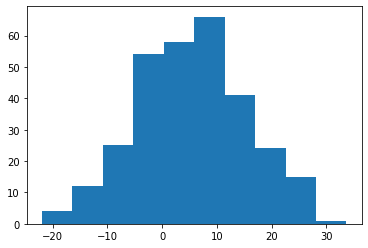

In [113]:
plt.hist(normal_samples)
plt.show()

In [114]:
gamma_samples = np.random.gamma(3, 2, size=500)

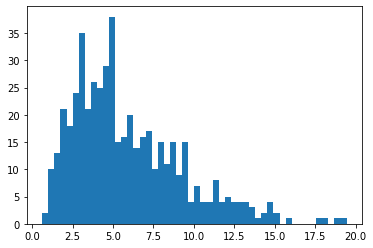

In [118]:
# I find that 50 bins is often a good number if you have a lot of data (basically no bins are empty)
plt.hist(gamma_samples, bins=50)
#plt.savefig('gamma_hist.png')
plt.show()

### Random walk

Random walk is a *very* widely used model in applied math. It has many applications in biology from bacterial chemotaxis, to polymer dynamics, to population genetics. Besides being useful they have the advantege of being both easy to simulate and tractable theoretically. 

Here is the idea: a walker starts at some point and at each time point takes a "random step." There are many ways to define a random step. 
- The original way as suggested by Pearson was in 2D, to take a step of fixed length but to randomly choose a direction. 
- Alternatively in 1D you could perform a "coin flip" and decide to take a step of fixed length to either the left or right.
- Finally you could choose a step from a probability distribution. 

Typically, we simulate many random walkers and compile statistics based on the set of walkers. Lets compute option 2 in numpy.

In [119]:
# 100 walkers, 1000 steps
steps = np.random.choice([-1,1], size=(100,1000))

In [120]:
# We need to cumulatively sum the steps to convert them to positions
walks = np.cumsum(steps, axis=-1)

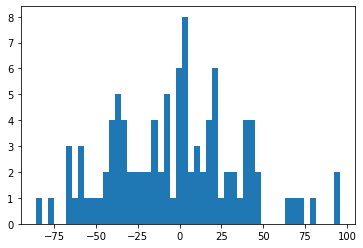

In [124]:
plt.hist(walks[:,-1].ravel(),bins=50)
plt.show()

What is the average position as a function of time?

What is the variance as function of time?

In [125]:
mean = walks.mean(0)
std = walks.std(0)

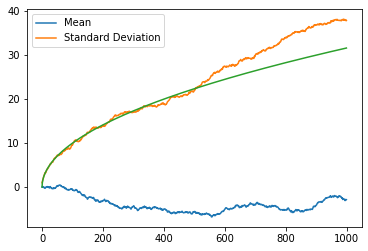

In [128]:
plt.plot(mean, label="Mean")
plt.plot(std, label="Standard Deviation")
plt.plot(np.arange(1000), np.sqrt(np.arange(1000)))
plt.legend()
plt.show()

The fact that the standard deviation grows like $\sqrt{t}$ is a hallmark feature of many types of random walks.

### Find the walkers who ended up farthest and closest to 0

In [129]:
closest = np.argmin(np.abs(walks[:,-1]))
farthest = np.argmax(np.abs(walks[:,-1]))

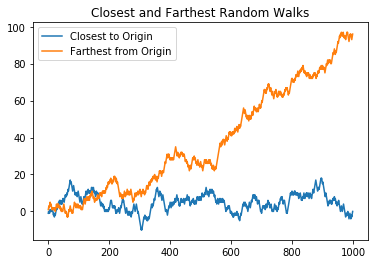

In [130]:
plt.plot(walks[closest], label="Closest to Origin")
plt.plot(walks[farthest], label="Farthest from Origin")
plt.legend()
plt.title("Closest and Farthest Random Walks")
plt.show()

### Lets do a 2D example for fun(?)

Here we will take the steps independently from a normal distribution.

In [131]:
steps = np.random.randn(100,1000,2)
walks2d = np.cumsum(steps,1)

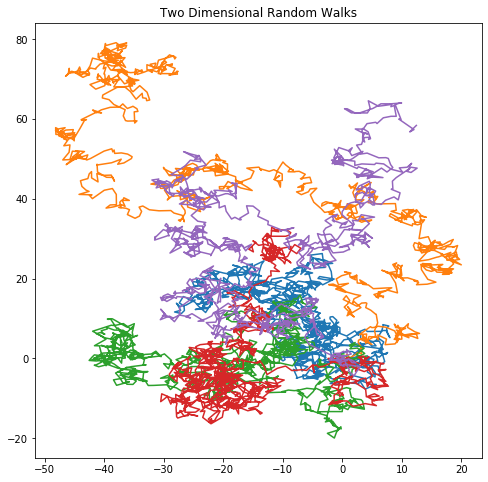

In [132]:
plt.figure(figsize=(8,8))
for i in range(5):
    plt.plot(walks2d[i,:,0], walks2d[i,:,1])
plt.title("Two Dimensional Random Walks")
plt.show()

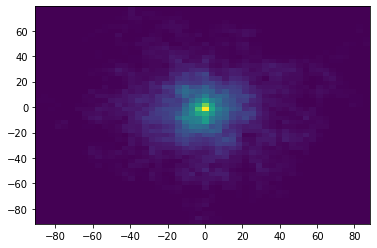

In [133]:
plt.hist2d(walks2d[:,:,0].ravel(),walks2d[:,:,1].ravel(), bins=50)
plt.show()

### Next time

We're going to take a look at `pandas` which is like numpy but specifically for tabular data (think excel). It's really nice to use for all sorts of data analysis project so were going to get into it sooner rather than later so that you can hopefully use it in your work. If you're curious check out the [pandas documentation](https://pandas.pydata.org/) and the [PDSH chapter](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas)